## Link:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview   

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [3]:
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000.
#pd. set_option('display.max_colwidth', -1) # or 199.

In [4]:
#Id_House = pd.read_csv('Data/sample_submission.csv', sep=',')
Features_House = pd.read_csv('Data/train.csv', sep=',') 

# 1 Estadistica Descriptiva
## 1.1 Caracterisitcas de los conjuntos de datos

In [5]:
# print("Base Top 5")
# print(Id_House.head())
# print()
# print("Dimensiones de la Base")
# print (Id_House.shape)
# print()
# print("Tipo de datos")
# print(Id_House.dtypes)
# print()
# print("Cantidad de valores Null")
# print(Id_House.isnull().sum())
# print()
# print("Cantidad de valores 0")
# print((Id_House==0).sum())

In [6]:
# print("Base Top 5")
# print()
# print(Features_House.head())
# print()
# print("Dimensiones de la Base")
# print()
# print (Features_House.shape)
# print()
# print("Tipo de datos")
# print()
# print(Features_House.dtypes)

In [7]:
# print("Cantidad de valores NULL")
# print()
# print(Features_House.isnull().sum())
# print()
# print("Cantidad de valores 0")
# print()
# print((Features_House==0).sum())

In [8]:
# len(set(Id_House['Id']).intersection(set(Features_House['Id'])))

## 1.2 Segmentamos  las variables CUALITATIVAS (Nominales y Ordinales) y CUANTITATIVAS (Discretas y Continuas)

In [9]:
# DataNum=[]
# for i in Features_House.columns[Features_House.dtypes == 'int64']:
#     DataNum.append(i)
# for i in Features_House.columns[Features_House.dtypes == 'float64']:
#     DataNum.append(i)
# DataNum
# FH_Numerical = Features_House.loc[:,DataNum].convert_dtypes()
# FH_Numerical

In [5]:
Nom = ['Id','MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1', \
      'Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation', \
      'BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']
Ord = ['Id','LotShape','LandSlope','HouseStyle','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']  
Num = ['Id','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','SalePrice']
Date = ['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']


In [6]:
FH_Numerical= Features_House.loc[:,Num]
FH_Ordinal = Features_House.loc[:,Ord]
FH_Nominal =Features_House.loc[:,Nom]
FH_Date =Features_House.loc[:,Date]

In [12]:
# print (Features_House.loc[:,Num].info())
# print (Features_House.loc[:,Ord].info())
# print (Features_House.loc[:,Nom].info())
# print (Features_House.loc[:,Date].info())

#### Analizamos graficamente los valores Null y Corregimos dichos datos

#### Datos Numericos:

In [13]:
# fig, axarr = plt.subplots(3,figsize=(40,30))
# msno.matrix(FH_Numerical, ax=axarr[0],inline=False,sparkline=False)
# msno.bar(FH_Numerical, ax=axarr[1],inline=False)
# msno.dendrogram(FH_Numerical, ax=axarr[2],inline=False,orientation='top')
# plt.show()

# print(FH_Numerical.isnull().sum())

Las variables "LotFrontage" y "MasVnrArea" contienen valores Null los cuales se puede reemplazar con las Medidas de Tendencia Central pero para este caso utilizaremos el algoritmo de "K Vecinos más Cercanos" para minimizar los sesgos.

In [14]:
# fig, axes = plt.subplots(1,2,figsize=(20,10))
# sns.histplot(x='LotFrontage', data=FH_Numerical, ax=axes[0])
# sns.histplot(x='MasVnrArea', data=FH_Numerical, ax=axes[1])

In [15]:
imputer = KNNImputer(n_neighbors=5)
FH_Numerical_trans = imputer.fit_transform(FH_Numerical)
FH_Numerical2 = pd.DataFrame(FH_Numerical_trans,columns= FH_Numerical.columns).convert_dtypes()
#FH_Numerical2

In [16]:
# print(FH_Numerical2.isnull().sum())

#### Datos Ordinales:

In [17]:
# fig, axarr = plt.subplots(3,figsize=(40,30))
# msno.matrix(FH_Ordinal, ax=axarr[0],inline=False,sparkline=False)
# msno.bar(FH_Ordinal, ax=axarr[1],inline=False)
# msno.dendrogram(FH_Ordinal, ax=axarr[2],inline=False,orientation='top')
# plt.show()
# print(FH_Ordinal.isnull().sum())

Consideraciones:
- Debido a que Python tomó la ausencia del atributo de la pregunta como Null, se les etiquetara estos datos para no perder inforación.
- Para el caso de "GarageQual" y "GarageCond" las 81 instacias se analizaran mas adelante (Tambien se reemplaza con "NA").

In [18]:
# print (FH_Ordinal["BsmtQual"].isnull().sum())
# print (FH_Ordinal["BsmtQual"].unique())

# print (FH_Ordinal["BsmtCond"].isnull().sum())
# print (FH_Ordinal["BsmtCond"].unique())

# print (FH_Ordinal["BsmtExposure"].isnull().sum())
# print (FH_Ordinal["BsmtExposure"].unique())

# print (FH_Ordinal["FireplaceQu"].isnull().sum())
# print (FH_Ordinal["FireplaceQu"].unique())

# print (FH_Ordinal["GarageQual"].isnull().sum())
# print (FH_Ordinal["GarageQual"].unique())

# print (FH_Ordinal["GarageCond"].isnull().sum())
# print (FH_Ordinal["GarageCond"].unique())

# print (FH_Ordinal["PoolQC"].isnull().sum())
# print (FH_Ordinal["PoolQC"].unique())

# print (FH_Ordinal["Fence"].isnull().sum())
# print (FH_Ordinal["Fence"].unique())

In [7]:
#FH_Ordinal=FH_Ordinal.drop(["Fence","PoolQC","FireplaceQu"],axis=1)
imp_mod = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="NA")
imp_mod.fit(FH_Ordinal)
FH_Ordinal_trans= imp_mod.transform(FH_Ordinal)
FH_Ordinal2 = pd.DataFrame(FH_Ordinal_trans, columns=FH_Ordinal.columns)

#### Datos Nominales:

In [20]:
# fig, axarr = plt.subplots(3,figsize=(40,30))
# msno.matrix(FH_Nominal, ax=axarr[0],inline=False,sparkline=False)
# msno.bar(FH_Nominal, ax=axarr[1],inline=False)
# msno.dendrogram(FH_Nominal, ax=axarr[2],inline=False,orientation='top')
# plt.show()
# print(FH_Nominal.isnull().sum())

Consideraciones: 
+ "Alley", "BsmtFinType1" , "BsmtFinType2" , "GarageType" , "GarageFinish" ,"MiscFeature" se reemplaza Null con "NA"
+ "MasVnrType","Electrical" reemplazamos con la Moda

In [21]:
# print (FH_Nominal["Alley"].isnull().sum())
# print (FH_Nominal["Alley"].unique())

# print (FH_Nominal["MasVnrType"].isnull().sum())
# print (FH_Nominal["MasVnrType"].unique())

# print (FH_Nominal["BsmtFinType1"].isnull().sum())
# print (FH_Nominal["BsmtFinType1"].unique())

# print (FH_Nominal["BsmtFinType2"].isnull().sum())
# print (FH_Nominal["BsmtFinType2"].unique())

# print (FH_Nominal["Electrical"].isnull().sum())
# print (FH_Nominal["Electrical"].unique())

# print (FH_Nominal["GarageType"].isnull().sum())
# print (FH_Nominal["GarageType"].unique())

# print (FH_Nominal["GarageFinish"].isnull().sum())
# print (FH_Nominal["GarageFinish"].unique())

# print (FH_Nominal["MiscFeature"].isnull().sum())
# print (FH_Nominal["MiscFeature"].unique())

In [8]:
SI_ALL =["Alley", "BsmtFinType1" , "BsmtFinType2" , "GarageType" , "GarageFinish" ,"MiscFeature","MasVnrType","Electrical"]
SI_NA =["Alley", "BsmtFinType1" , "BsmtFinType2" , "GarageType" , "GarageFinish" ,"MiscFeature"]
SI_MD = ["MasVnrType","Electrical"]

imp_mod = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="NA")
imp_mod.fit(FH_Nominal.loc[:,SI_NA])

FH_Nominal_trans1= imp_mod.transform(FH_Nominal.loc[:,SI_NA])
FH_Nominal_A1 = pd.DataFrame(FH_Nominal_trans1, columns=FH_Nominal.loc[:,SI_NA].columns)

imp_mod2 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_mod2.fit(FH_Nominal.loc[:,SI_MD])

FH_Nominal_trans2= imp_mod2.transform(FH_Nominal.loc[:,SI_MD])
FH_Nominal_A2 = pd.DataFrame(FH_Nominal_trans2, columns=FH_Nominal.loc[:,SI_MD].columns)

FH_Nominal2 = pd.concat([FH_Nominal.drop(SI_ALL,axis=1),FH_Nominal_A1,FH_Nominal_A2],axis=1)

In [23]:
# print(FH_Nominal2.isnull().sum())

#### Fechas:

Como hemos venido viendo las variables relaciondas al garage estan condicionadas al año de construccion, por ende, si no se construye no se tiene un garage. Para evitar las pérdida de estas 81 observaciones con valores Null, transformamos la variable "GarageYrBlt" para construir una variable que mida los años que se "tuvo el Garage" hasta el momento de la venta y con ello no eliminar las 81 observaciones.

In [24]:
# fig, axarr = plt.subplots(3,figsize=(40,30))
# msno.matrix(FH_Date, ax=axarr[0],inline=True,sparkline=False)
# msno.bar(FH_Date, ax=axarr[1],inline=False)
# msno.dendrogram(FH_Date, ax=axarr[2],inline=False,orientation='top')
# plt.show()
# print( FH_Date.isnull().sum())

In [9]:
TG = FH_Date["YrSold"].sub(FH_Date["GarageYrBlt"])
FH_DateA1 = pd.concat([FH_Date.loc[:,["Id","YearBuilt","YearRemodAdd","YrSold"]],pd.DataFrame(TG, columns=["Time_Grg"])],axis=1).convert_dtypes() 


In [10]:
imp3 = SimpleImputer(missing_values=np.nan,strategy="constant", fill_value=0)
imp3.fit(FH_DateA1)
FH_DateA2 = imp3.transform(FH_DateA1)
FH_Date2 = pd.DataFrame(FH_DateA2,columns=FH_DateA1.columns).convert_dtypes() 

In [27]:
#print( FH_Numerical2.dtypes)
#print( FH_Ordinal2.dtypes)
#print( FH_Nominal2.dtypes)
#print( FH_Date2.dtypes)

In [11]:
Id =FH_Ordinal2.Id.astype('int64')
DataNum=[]
for i in FH_Ordinal2.columns[FH_Ordinal2.dtypes == 'object']:
    DataNum.append(i)
FH_Ordinal2 = FH_Ordinal2.loc[:,DataNum].astype("category", copy=False)
FH_Ordinal2['Id'] = Id

In [12]:
Id =FH_Nominal2.Id.astype('int64')
MSSubClass = FH_Nominal2.MSSubClass.astype('category')
DataNum=[]
for i in FH_Nominal2.columns[FH_Nominal2.dtypes == 'object']:
    DataNum.append(i)
FH_Nominal2 = FH_Nominal2.loc[:,DataNum].astype("category", copy=False)
FH_Nominal2['MSSubClass'] = MSSubClass
FH_Nominal2['Id'] = Id

Una vez que todos los valores Null se han corregido y categorizado las variables , se procede hacer un merge. 

In [13]:
FH_v2 = FH_Date2.merge(FH_Numerical2,on="Id").merge(FH_Ordinal2,on="Id").merge(FH_Nominal2,on="Id")    
FH_v2.head()   

NameError: name 'FH_Numerical2' is not defined

In [33]:
# del FH_Date , FH_DateA1
# del FH_DateA2,FH_Nominal,FH_Nominal_A1,FH_Nominal_A2,FH_Nominal_trans1,FH_Nominal_trans2,FH_Numerical,FH_Numerical_trans,FH_Ordinal,FH_Ordinal_trans,Features_House,Id
# del DataNum,Date,KNNImputer,MSSubClass,Nom,Num,Ord,SI_ALL,SI_MD,SI_NA,SimpleImputer,TG
#del i,imp3,imp_mod,imp_mod2,imputer
# del axarr,fig
%whos

Variable        Type         Data/Info
--------------------------------------
FH_Date2        DataFrame            Id  YearBuilt  Ye<...>   1965    2008        43
FH_Nominal2     DataFrame         MSZoning Street Land<...> SBrkr         20  1460  
FH_Numerical2   DataFrame            Id  LotFrontage  <...>   0       6     147500  
FH_Ordinal2     DataFrame            Id LotShape LandS<...>       TA     NA     NA  
FH_v2           DataFrame            Id  YearBuilt  Ye<...>  20  \n1459         20  
msno            module       <module 'missingno' from <...>s/missingno/__init__.py'>
np              module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd              module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt             module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns             module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


### Análisis Gráfico

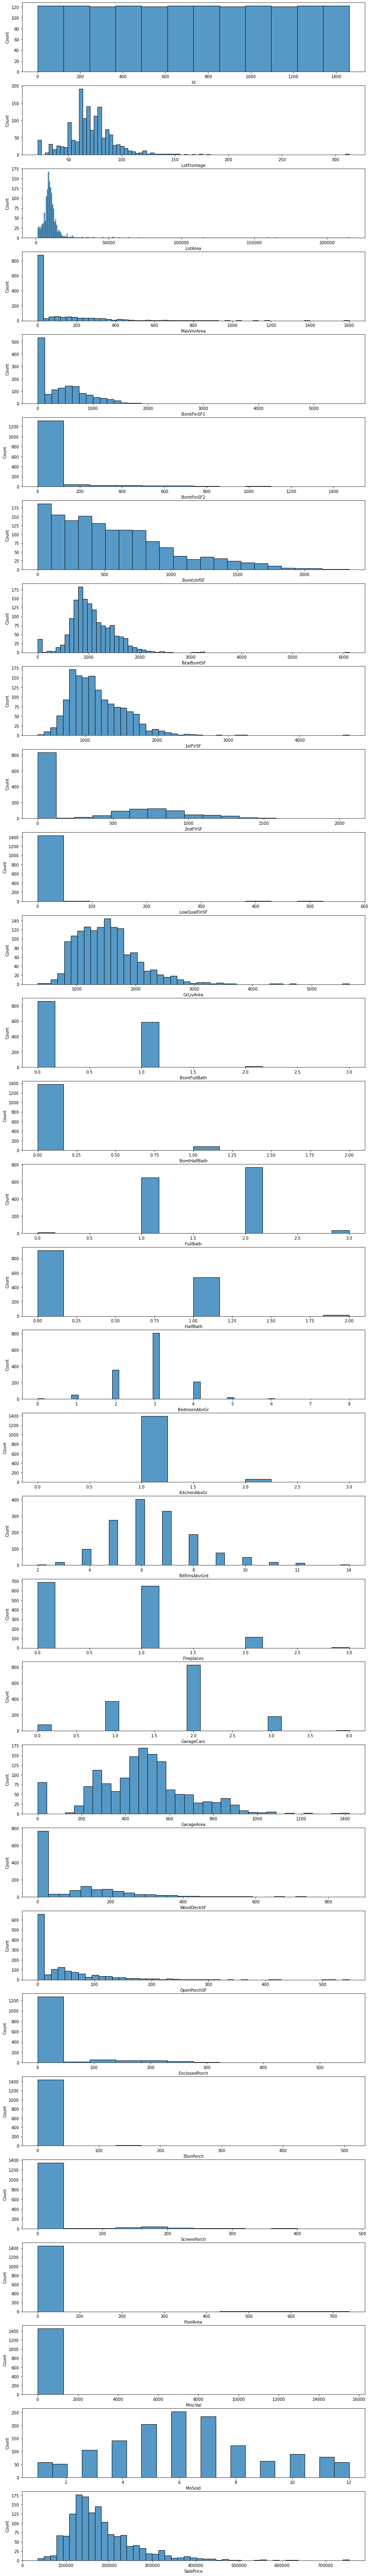

In [39]:
Col_Num = FH_Numerical2.columns
Can_Num = len (FH_Numerical2.columns)

fig, axes = plt.subplots(Can_Num,figsize=(15,115))
ax = 0

while ax < Can_Num:
    for i in Col_Num:
        sns.histplot(data=FH_Numerical2, x=i,ax=axes[ax])
        ax+=1 

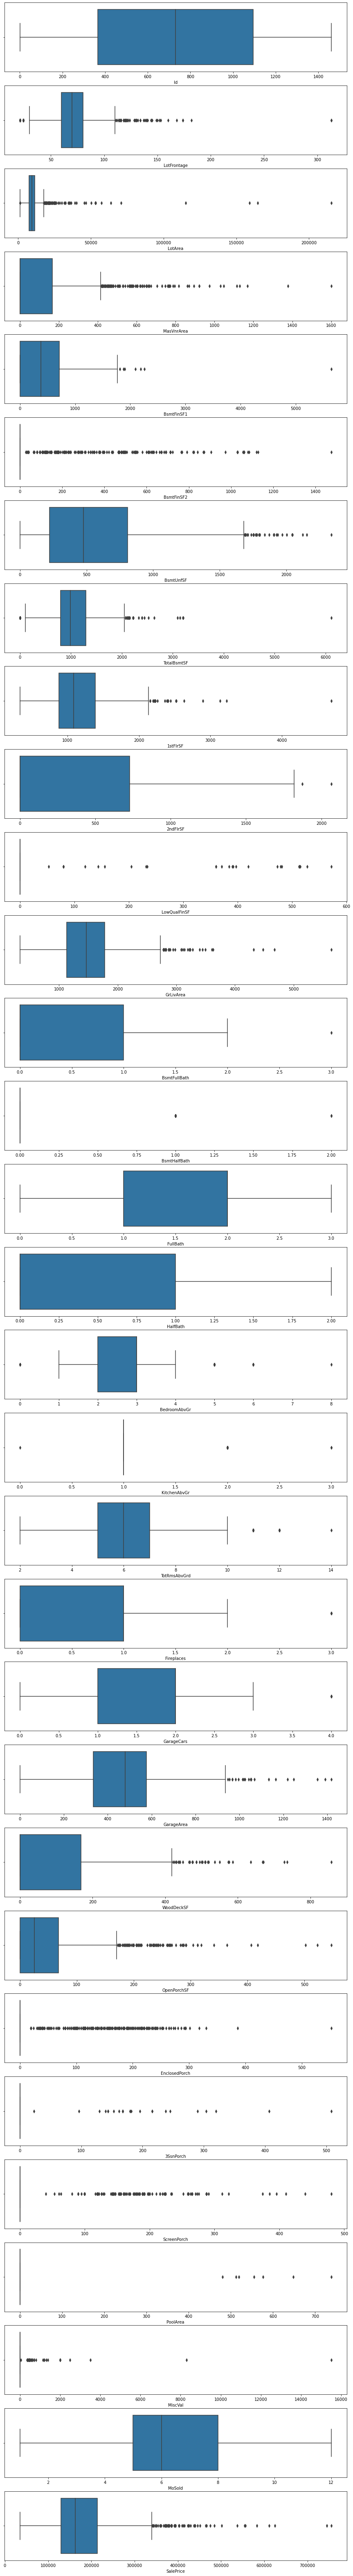

In [42]:
Col_Num = FH_Numerical2.columns
Can_Num = len (FH_Numerical2.columns)

fig, axes = plt.subplots(Can_Num,figsize=(15,115))
ax = 0

while ax < Can_Num:
    for i in Col_Num:
        sns.boxplot(data=FH_Numerical2, x=i,ax=axes[ax])
        ax+=1 

AttributeError: 'PathCollection' object has no property 'kind'

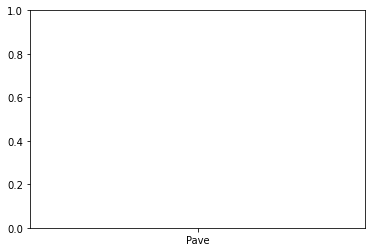

In [51]:
sns.stripplot(x='Street', kind="box",data=FH_Nominal2)

In [43]:
FH_Nominal2.head()

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Functional,PavedDrive,SaleType,SaleCondition,Alley,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,MiscFeature,MasVnrType,Electrical,MSSubClass,Id
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal,NA,GLQ,Unf,Attchd,RFn,NA,BrkFace,SBrkr,60,1
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,Y,Typ,Y,WD,Normal,NA,ALQ,Unf,Attchd,RFn,NA,None,SBrkr,20,2
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal,NA,GLQ,Unf,Attchd,RFn,NA,BrkFace,SBrkr,60,3
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,Y,Typ,Y,WD,Abnorml,NA,ALQ,Unf,Detchd,Unf,NA,None,SBrkr,70,4
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,Typ,Y,WD,Normal,NA,GLQ,Unf,Attchd,RFn,NA,BrkFace,SBrkr,60,5
